In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 14 * 14, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 14 * 14)
        x = self.fc1(x)
        return x

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
def accuracy_fn(y_true, y_pred):
    y_pred_classes = y_pred.argmax(dim=1)
    correct_predictions = (y_pred_classes == y_true).sum().item()
    accuracy = correct_predictions / y_true.size(0)
    return accuracy

In [ ]:
model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

num_epochs = 10
print_interval = 200
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (batch_images, batch_labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

        if (batch_idx + 1) % print_interval == 0:
            batch_acc = correct_train / total_train
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(trainloader)}], Loss: {loss.item():.4f}, Acc: {batch_acc:.4f}")

    epoch_train_acc = correct_train / total_train
    train_accuracies.append(epoch_train_acc)
    avg_train_loss = total_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    model.eval()
    test_acc = 0.0
    test_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for test_images, test_labels in testloader:
            test_outputs = model(test_images)
            test_acc += accuracy_fn(test_labels, test_outputs)
            test_loss += criterion(test_outputs, test_labels).item()
            total_samples += test_labels.size(0)

    epoch_test_acc = test_acc / len(testloader)
    test_accuracies.append(epoch_test_acc)
    avg_test_loss = test_loss / len(testloader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {epoch_test_acc:.4f}\n")



Epoch [1/10], Batch [200/938], Loss: 0.5427, Acc: 0.7002
Epoch [1/10], Batch [400/938], Loss: 0.4470, Acc: 0.7904
Epoch [1/10], Batch [600/938], Loss: 0.3119, Acc: 0.8289
Epoch [1/10], Batch [800/938], Loss: 0.4944, Acc: 0.8503
Epoch [1/10], Test Accuracy: 0.9297

Epoch [2/10], Batch [200/938], Loss: 0.3705, Acc: 0.9252
Epoch [2/10], Batch [400/938], Loss: 0.2249, Acc: 0.9286
Epoch [2/10], Batch [600/938], Loss: 0.1498, Acc: 0.9305
Epoch [2/10], Batch [800/938], Loss: 0.3038, Acc: 0.9325
Epoch [2/10], Test Accuracy: 0.9495

Epoch [3/10], Batch [200/938], Loss: 0.1653, Acc: 0.9420
Epoch [3/10], Batch [400/938], Loss: 0.4089, Acc: 0.9461
Epoch [3/10], Batch [600/938], Loss: 0.1838, Acc: 0.9474
Epoch [3/10], Batch [800/938], Loss: 0.1675, Acc: 0.9490
Epoch [3/10], Test Accuracy: 0.9581

Epoch [4/10], Batch [200/938], Loss: 0.0675, Acc: 0.9534
Epoch [4/10], Batch [400/938], Loss: 0.1414, Acc: 0.9561
Epoch [4/10], Batch [600/938], Loss: 0.1099, Acc: 0.9570
Epoch [4/10], Batch [800/938], Los

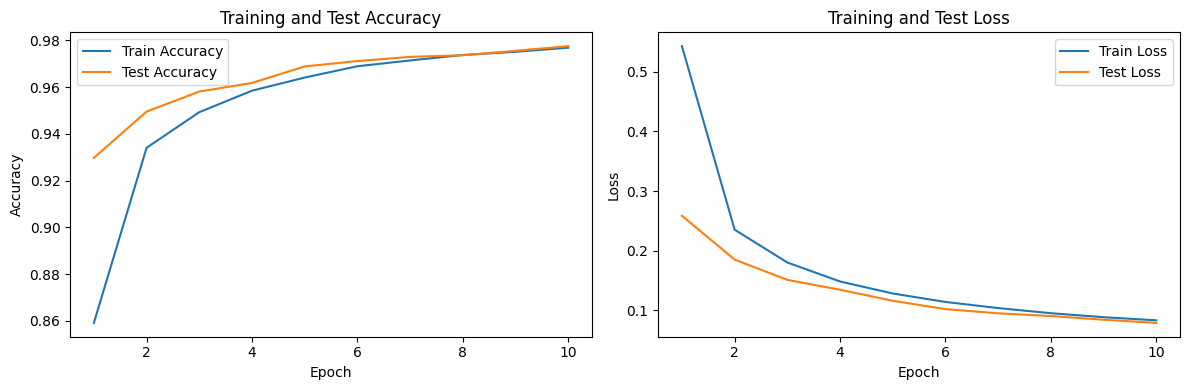

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.tight_layout()
plt.show()